In [ ]:
from joblib import load

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
modelA = load('modelA.joblib')
modelB = load('modelB.joblib')
modelC = load('modelC.joblib')

In [ ]:
new_data_A = pd.read_csv('NORMAL_A_WEIRD.csv', index_col ='TIME')

In [ ]:
dfa = pd.read_csv('NORMAL_A.csv', index_col = 'TIME')
dfb = pd.read_csv('NORMAL_B.csv', index_col = 'TIME')
dfc = pd.read_csv('NORMAL_C.csv', index_col = 'TIME')


In [ ]:
dfa = dfa.iloc[0:2365,:]
dfb = dfb.iloc[0:2365,:]
dfc = dfc.iloc[0:2365,:]

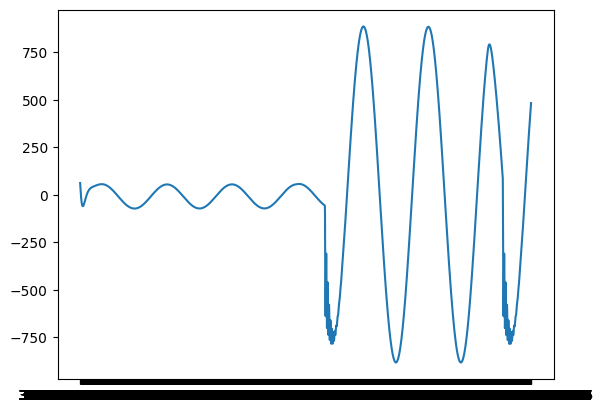

In [ ]:
plt.plot(new_data_A['Ia'], )

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dfb.index, dfb.iloc[:2300,0:1], label='Sensor B - Actual', color='blue')
plt.plot(dfb.index, dfb.iloc[0:2365,0:1], label='Sensor B - Predicted', color='red')
plt.title('Volatility Comparison')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

Index(['31-01-2024 00:00', '31-01-2024 00:01', '31-01-2024 00:02',
       '31-01-2024 00:03', '31-01-2024 00:04', '31-01-2024 00:05',
       '31-01-2024 00:06', '31-01-2024 00:07', '31-01-2024 00:08',
       '31-01-2024 00:09',
       ...
       '01-02-2024 15:15', '01-02-2024 15:16', '01-02-2024 15:17',
       '01-02-2024 15:18', '01-02-2024 15:19', '01-02-2024 15:20',
       '01-02-2024 15:21', '01-02-2024 15:22', '01-02-2024 15:23',
       '01-02-2024 15:24'],
      dtype='object', name='TIME', length=2365)

In [ ]:
predicted_Df.describe()

,Ia,Va
count,2365.000000,2365.000000
mean,-24.817694,-0.223434
std,0.398020,0.011585
min,-25.231014,-0.417464
25%,-24.829222,-0.223760
50%,-24.829220,-0.223760
75%,-24.829220,-0.223760
max,-6.875030,0.235981


In [ ]:
plt.plot(predicted_Df['Ia'])

NameError: name 'plt' is not defined

In [ ]:
def prepare_data(df, sequence_length=7):

    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)
    X, y = [], []

    for i in range(len(df) - sequence_length):
        X.append(df.iloc[i:i + sequence_length].values)
        y.append(df.iloc[i + sequence_length].values)


    X_train = np.array(X)
    y_train = np.array(y)
    lena = len(df.iloc[:,:])

    return X_train, y_train,lena

In [ ]:
xta,yta,lena = prepare_data(new_data_A)

<Figure size 1000x600 with 0 Axes>

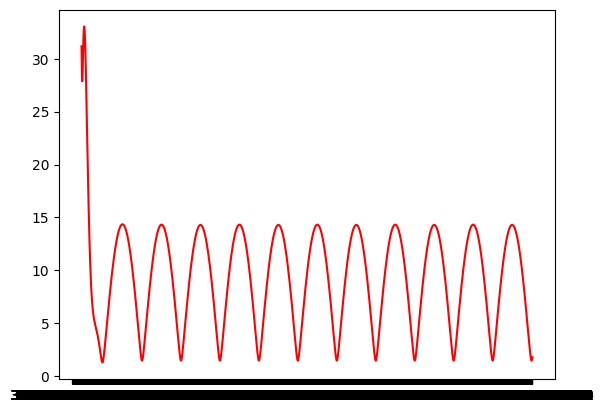

<Figure size 1000x600 with 0 Axes>

In [ ]:
volatility_df2 = dfa['Ia'].rolling(window=50).std()
plt.plot(dfa.index, volatility_df2, label='Volatility - DataFrame 2', color='red')
plt.figure(figsize=(10, 6))

In [ ]:
def predict(data, model, future_periods):
    forecast_values = []
    last_sequence = data[0]

    for _ in range(future_periods):
        next_prediction = model.predict(last_sequence.reshape(1, -1, data.shape[2]))[0]
        last_sequence = np.concatenate((last_sequence[1:], next_prediction.reshape(1, data.shape[2])))
        forecast_values.append(next_prediction)

    forecast_values = np.array(forecast_values)

    return forecast_values

In [ ]:
forecast_values = predict(xta,modelA,lena)

In [ ]:
forecast_values

array([[ -6.87503   ,   0.2359809 ],
       [-17.633217  ,  -0.09447966],
       [-24.43767   ,  -0.41746387],
       ...,
       [-24.82922   ,  -0.22376008],
       [-24.82922   ,  -0.22376008],
       [-24.82922   ,  -0.22376008]], dtype=float32)

In [ ]:
def create_new_df(forecast_values,og_df,future_periods):
  last_timestamp = dfa.index[0]

  future_timestamps = pd.date_range(start=last_timestamp, periods=future_periods+1, freq='Min')[1:]

  forecast_dfa = pd.DataFrame(forecast_values, index=future_timestamps, columns=dfa.columns)

  return forecast_dfa

In [ ]:
predicted_Df = create_new_df(forecast_values,dfa,lena)

In [ ]:
len(forecast_values[:len(dfa)])

2365

In [ ]:
len(dfa)

2365

In [ ]:
def create_new_df(forecast_values, og_df, future_periods):
    # Extract the start time from the original DataFrame's index
    start_time = og_df.index[0]

    # Generate the new index using pd.date_range()
    new_index = og_df.index

    # Create the new DataFrame using the forecast values and the new index
    forecast_df = pd.DataFrame(forecast_values[:len(og_df)], index=new_index, columns=og_df.columns)

    return forecast_df

In [ ]:
def calculate_volatility(df1,df2):
  volatility_df1 = df1['Ia'].rolling(window=150).std()
  volatility_df2 = df2['Ia'].rolling(window=150).std()
  plt.figure(figsize=(10, 6))
  plt.plot(df1.index, volatility_df1, label='Volatility - DataFrame 1', color='blue')
  plt.plot(df2.index, volatility_df2, label='Volatility - DataFrame 2', color='red')
  plt.title('Volatility Comparison')
  plt.xlabel('Time')
  plt.ylabel('Volatility')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
def calculate_volatility(df1, df2):
    volatility_df = pd.DataFrame()  # Create an empty DataFrame to store volatility values


    df1 = df1.iloc[0:2365,:]
    df2 = df2.iloc[0:2365,:]
    volatility_df.index = df1.index
    volatility_df['Volatility_df1'] = df1['Ib'].rolling(window=150).std()
    volatility_df['Volatility_df2'] = df2['Ib'].rolling(window=150).std()

    plt.figure(figsize=(10, 6))
    plt.plot(df1.index, volatility_df['Volatility_df1'], label='Volatility - DataFrame 1', color='blue')
    plt.plot(df2.index, volatility_df['Volatility_df2'], label='Volatility - DataFrame 2', color='red')
    plt.title('Volatility Comparison')
    plt.xlabel('Time')
    plt.ylabel('Volatility')
    plt.legend()
    plt.grid(True)
    plt.show()

    return volatility_df

# Example usage:
# volatility_df = calculate_volatility(df1, df2)


In [ ]:
volatility_df = calculate_volatility(dfb,dfb)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df1.index, volatility_df1, label='Volatility - DataFrame 1', color='blue')
plt.plot(df2.index, volatility_df2, label='Volatility - DataFrame 2', color='red')
plt.title('Volatility Comparison')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def trigger_alert(volatility_df, column1, column2, volatility_threshold):
    if (volatility_df[column1].diff().abs() > volatility_threshold).any() or (volatility_df[column2].diff().abs() > volatility_threshold).any():
        return "Alert: Volatility threshold exceeded!"
    else:
        return "No significant volatility change."

In [ ]:
volatility_df.dropna()

,Volatility_df1,Volatility_df2
TIME,,
31-01-2024 02:29,37.398217,37.398217
31-01-2024 02:30,37.347986,37.347986
31-01-2024 02:31,37.373395,37.373395
31-01-2024 02:32,37.440060,37.440060
31-01-2024 02:33,37.512802,37.512802
...,...,...
01-02-2024 15:20,432.256781,27.732302
01-02-2024 15:21,427.908105,27.369399
01-02-2024 15:22,423.477717,27.002155


In [ ]:
def trigger_alert(volatility_df, column1, column2, volatility_threshold):
    for index, (val1, val2) in enumerate(zip(volatility_df[column1].dropna(), volatility_df[column2].dropna())):
        if abs(val1 - val2) > volatility_threshold:
            return "Alert: Volatility threshold exceeded at index {}".format(index) , val1,val2 , volatility_df.index[index] , volatility_df.index[index+3]
    return "No significant volatility change.", val1,val2

In [ ]:
trigger_alert(volatility_df, 'Volatility_df1', 'Volatility_df2', 100)


('Alert: Volatility threshold exceeded at index 1371',
 145.1758637859787,
 37.15863840091136,
 '31-01-2024 22:51',
 '31-01-2024 22:54')

In [ ]:
import pandas as pd
import numpy as np

def prepare_data(df, sequence_length=7):

    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)
    X, y = [], []

    for i in range(len(df) - sequence_length):
        X.append(df.iloc[i:i + sequence_length].values)
        y.append(df.iloc[i + sequence_length].values)


    X_train = np.array(X)
    y_train = np.array(y)

    return X_train, y_train

def predict(data, model, future_periods=24):
    forecast_values = []
    last_sequence = data[-1]

    for _ in range(future_periods):
        next_prediction = model.predict(last_sequence.reshape(1, -1, data.shape[1]))[0]
        last_sequence = np.concatenate((last_sequence[1:], next_prediction.reshape(1, data.shape[1])))
        forecast_values.append(next_prediction)

    forecast_values = np.array(forecast_values)

    return forecast_values

# Function to calculate volatility
def calculate_volatility(data):
    return data.rolling(window=50).std()  # Placeholder for demonstration purposes

# Function to trigger alerts
def trigger_alert(prediction, actual, volatility_threshold):
    if abs(prediction - actual) > volatility_threshold:
        print("Alert: Prediction threshold exceeded!")

# Set up a continuous data stream (for demonstration, you can replace this with your actual data source)
while True:
    # Get the latest data point from the data stream
    new_data_point = get_latest_data_point()  # Placeholder for demonstration purposes

    # Update the dataset with the new data point
    dataset.append(new_data_point)

    # Make a prediction based on the updated dataset
    prediction = predict(dataset)

    # Calculate volatility based on the updated dataset
    volatility = calculate_volatility(dataset)

    # Trigger an alert if necessary
    trigger_alert(prediction, actual_value, volatility_threshold)


In [ ]:
import pandas as pd
import numpy as np

# Read the provided CSV file
data = pd.read_csv('NORMAL_A.csv')
data = data.iloc[0:2365,:]

# Extract timestamps and values
timestamps = pd.to_datetime(data['TIME'])
values = data['Ia']

# Determine the time difference between consecutive timestamps
time_diff = (timestamps.iloc[1] - timestamps.iloc[0]).seconds / 60  # Assuming the data is minute-based

# Identify the seasonal pattern (for example, a sine wave)
frequency = 2 * np.pi / (24 * 60)  # Assuming a frequency of 1 cycle per day
amplitude = 10  # Adjust as per the observed amplitude in the provided data

# Generate additional timestamps
num_additional_samples = 1000  # Number of additional samples to generate
additional_timestamps = pd.date_range(start=timestamps.iloc[-1], periods=num_additional_samples + 1, freq='{}min'.format(time_diff))[1:]

# Convert additional timestamps to a pandas Series object
additional_timestamps_series = pd.Series(additional_timestamps)

# Combine the provided and additional data
extended_timestamps = timestamps.append(additional_timestamps_series)
extended_values = np.concatenate((values, additional_values))

# Save the extended data to a new CSV file
extended_data = pd.DataFrame({'Timestamp': extended_timestamps, 'Value': extended_values})
# extended_data.to_csv('extended_data.csv', index=False)


<ipython-input-8-2c291e56ee97>:27: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extended_timestamps = timestamps.append(additional_timestamps_series)


In [ ]:
extended_data

,Timestamp,Value
0,2024-01-31 00:00:00,61.806321
1,2024-01-31 00:01:00,48.041678
2,2024-01-31 00:02:00,34.256533
3,2024-01-31 00:03:00,20.464350
4,2024-01-31 00:04:00,7.109677
...,...,...
995,2024-01-03 08:00:00,8.660254
996,2024-01-03 08:01:00,8.638355
997,2024-01-03 08:02:00,8.616292
998,2024-01-03 08:03:00,8.594064


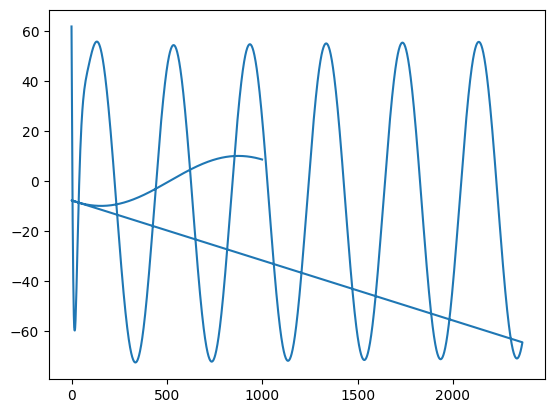

In [ ]:
import matplotlib.pyplot as plt
plt.plot(extended_data['Value'])